In [1]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
import warnings
import statsmodels.api as sm

In [2]:
df = pd.read_csv('dataset/nyc-rolling-sales.csv')
pd.set_option('display.max.columns',25)
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


**Kolom pada dataset ini memiliki 22 Kolom diantaranya adalah:**
1. Unnamed: 0   :yang dinilai tidak memiliki informasi dataset yang berguna
2. BOROUGH      : Merupakan salah satu dari wilayah NYC yaitu Bronx, Brooklyn, Manhattan, Queens, dan Staten Island.
3. NEIGHBORHOOD : Nama lingkungan tempat properti berada
4. BUILDING CLASS CATEGORY : kategori bangunan seperti apartemen, gedung kantor, gedung industri, dll
5. TAX CLASS AT PRESENT : Kelas pajak yang menunjukkan jenis pajak properti yang berlaku saat ini
6. BLOCK : Nomor blok dari properti
7. LOT   : Nomor Lot properti
8. EASE-MENT : Informasi mengenai akses atau hak kepemilikan di atas properti
9. BUILDING CLASS AT PRESENT : Kategori jenis bangunan saat ini
10. ADDRESS: Alamat properti
11. APARTMENT NUMBER: Nomor apartemen
12. ZIP CODE : Kode pos dari properti
13. RESIDENTIAL UNITS: Jumlah unit residensial dalam properti
14. COMMERCIAL UNITS: Jumlah unit komersial dalam properti
15. TOTAL UNITS: Jumlah total unit dalam properti
16. LAND SQUARE FEET: Luas tanah dalam persegi
17. GROSS SQUARE FEET: Luas total bangunan dalam persegi
18. YEAR BUILT : Tahun pembangunan properti
19. TAX CLASS AT TIME OF SALE: Kelas pajak menunjukkan jenis pajak properti pada saat penjualan
20. BUILDING CLASS AT TIME OF SALE: Kelas bangunan menunjukkan jenis bangunan pada saat penjualan
21. SALE PRICE: Harga jual properti
22. SALE DATE: Tanggal penjualan properti
23. RECORD TYPE: Jenis catatan yang dihasilkan oleh Departemen Perpajakan dan Pelayanan Keuangan (Department of Finance) untuk transaksi properti.

**Menghapus kolom yang kurang penting**

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

Kolom Unnamed: 0 dihapus karena dinilai tidak memiliki makna apapun dalam dataset

**Memberikan informasi dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

**Melihat nilai null dalam dataset**

In [5]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

**Menampilkan 5 Data Teratas**

In [6]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


**Menampilkan 5 Data Terbawah**

In [7]:
df.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


**Melihat dimensi data**

In [8]:
df.shape

(84548, 21)

data memiliki 84.548 baris dan 21 kolom 

In [9]:
df_new = df[['BOROUGH', 'TOTAL UNITS', 'YEAR BUILT',
               'TAX CLASS AT TIME OF SALE', 'SALE PRICE']]

In [10]:
df_new.head()

,BOROUGH,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,5,1900,2,6625000
1,1,31,1900,2,-
2,1,17,1900,2,-
3,1,10,1913,2,3936272
4,1,6,1900,2,8000000


variabel baru dibuat untuk menyimpan kolom yang dianggap memiliki data numerik saja.

pd.set_option() digunakan untuk menampilkan maximal kolom agar dapat dilihat dengan mudah

**Mengecek nilai error**

In [11]:
cnt=0
for row in df_new['BOROUGH']:
    try:
        float(row)
    except ValueError:
        df_new.loc[cnt, 'BOROUGH']=np.nan
    cnt+=1

df_new.head()

,BOROUGH,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,5,1900,2,6625000
1,1,31,1900,2,-
2,1,17,1900,2,-
3,1,10,1913,2,3936272
4,1,6,1900,2,8000000


mengecek nilai error pada kolom BOROUGH menggunakan try and except sehingga digantikan dengan nilai NaN atau Null pada baris tersebut

In [12]:
cnt=0
for row in df_new['TOTAL UNITS']:
    try:
        float(row)
    except ValueError:
        df_new.loc[cnt, 'TOTAL UNITS']=np.nan
    cnt+=1

df_new.head()

,BOROUGH,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,5,1900,2,6625000
1,1,31,1900,2,-
2,1,17,1900,2,-
3,1,10,1913,2,3936272
4,1,6,1900,2,8000000


mengecek nilai error pada kolom TOTAL UNITS menggunakan try and except sehingga digantikan dengan nilai NaN atau Null pada baris tersebut

In [13]:
cnt=0
for row in df_new['YEAR BUILT']:
    try:
        float(row)
    except ValueError:
        df_new.loc[cnt, 'YEAR BUILT']=np.nan
    cnt+=1

df_new.head()

,BOROUGH,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,5,1900,2,6625000
1,1,31,1900,2,-
2,1,17,1900,2,-
3,1,10,1913,2,3936272
4,1,6,1900,2,8000000


mengecek nilai error pada kolom YEAR BUILT menggunakan try and except sehingga digantikan dengan nilai NaN atau Null pada baris tersebut

In [14]:
cnt=0
for row in df_new['TAX CLASS AT TIME OF SALE']:
    try:
        float(row)
    except ValueError:
        df_new.loc[cnt, 'TAX CLASS AT TIME OF SALE']=np.nan
    cnt+=1

df_new.head()

,BOROUGH,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,5,1900,2,6625000
1,1,31,1900,2,-
2,1,17,1900,2,-
3,1,10,1913,2,3936272
4,1,6,1900,2,8000000


mengecek nilai error pada kolom TAX CLASS AT TIME OF SALE menggunakan try and except sehingga digantikan dengan nilai NaN atau Null pada baris tersebut

In [15]:
cnt=0
for row in df_new['SALE PRICE']:
    try:
        float(row)
    except ValueError:
        df_new.loc[cnt, 'SALE PRICE']=np.nan
    cnt+=1

df_new.head()

,BOROUGH,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,5,1900,2,6625000
1,1,31,1900,2,NaN
2,1,17,1900,2,NaN
3,1,10,1913,2,3936272
4,1,6,1900,2,8000000


mengecek nilai error pada kolom SALE PRICE menggunakan try and except sehingga digantikan dengan nilai NaN atau Null pada baris tersebut

In [16]:
df_new.isnull().sum()

BOROUGH                          0
TOTAL UNITS                      0
YEAR BUILT                       0
TAX CLASS AT TIME OF SALE        0
SALE PRICE                   14561
dtype: int64

Setelah dilakukan pengecekan menggunakan try and except, dicek nilai null kembali menggunakan isnull() sehingga diketahui nilai null yang baru sejumlah 14.561 data

kolom 84.548

nilai null 14561

keputusan yang dibuat adalah mencoba menghapus nilai null dengan fungsi dropna()

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BOROUGH                    84548 non-null  int64 
 1   TOTAL UNITS                84548 non-null  int64 
 2   YEAR BUILT                 84548 non-null  int64 
 3   TAX CLASS AT TIME OF SALE  84548 non-null  int64 
 4   SALE PRICE                 69987 non-null  object
dtypes: int64(4), object(1)
memory usage: 3.2+ MB


In [18]:
df_new.dropna(axis=0,inplace=True)

C:\Users\USER DK\AppData\Local\Temp\ipykernel_9252\10632992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(axis=0,inplace=True)


menghapus kolom yang mengandung nilai null sebanyak 14.561 data

In [19]:
df_new.head()

,BOROUGH,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,5,1900,2,6625000
3,1,10,1913,2,3936272
4,1,6,1900,2,8000000
6,1,8,1920,2,3192840
9,1,24,1920,2,16232000


## Measure of Central Tendency: Mean

In [20]:
# np.mean(df_nyc['YEAR BUILT'])
scipy.mean(df_new['TOTAL UNITS'])

C:\Users\USER DK\AppData\Local\Temp\ipykernel_9252\1206816870.py:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  scipy.mean(df_new['TOTAL UNITS'])


2.092202837669853

In [21]:
np.mean(df_new['TOTAL UNITS'])

2.092202837669853

menggunakan library scipy dan numpy untuk melihat mean dari Total Units hasilnya sama. Jika dibulatkan maka rata-rata total units dari dataset ini adalah 2 unit

In [22]:
np.mean(df_new['YEAR BUILT'])

1799.34823610099

menggunakan numpy diketahui bahwa rata rata penjualan properti berada pada tahun pembuatan 1799

## Measure of Central Tendency: Median

In [23]:
np.median(df_new['TOTAL UNITS'])

1.0

menggunakan numpy diketahui bahwa median atau nilai tengah dari total units properti yang dibangun adalah 1 unit

In [24]:
np.median(df_new['YEAR BUILT'])

1937.0

menggunakan numpy diketahui bahwa median atau nilai tengah dari year built atau tahun pembuatan properti yang dibangun adalah tahun 1937

## Measure of Central Tendency: Modus / Mode

In [25]:
scipy.stats.mode(df_new['YEAR BUILT'])

ModeResult(mode=array([0], dtype=int64), count=array([5391]))

In [26]:
df_new.iloc[5391]

BOROUGH                           1
TOTAL UNITS                       0
YEAR BUILT                     1955
TAX CLASS AT TIME OF SALE         2
SALE PRICE                   775000
Name: 6888, dtype: object

dapat diketahui menggunakan library scipy untuk mencari modus data bahwa modus dataset ini berada pada array 5391. Jika dilakukan pencarian menggunakan fungsi iloc maka dapat diketahui bahwa modus (data yang paling banyak muncul) dari kolom YEAR BUILT adalah tahun 1955 dengan borough 1 atau manhattan

## Measure of Spread : Range

In [27]:
df_year = df_new['YEAR BUILT'].to_numpy()
df_year

array([1900, 1913, 1900, ..., 1925, 2001, 2006], dtype=int64)

dibuat variabel baru untuk menyimpan nilai df['YEAR BUILT'] yang diubah menjadi array untuk dilakukan perhitungan range()

In [28]:
np.ptp(df_year)

2017

np.ptp mengembalikan rentang nilai sepanjang sumbu, atau sama saja dengan peak to peak yang berarti pengurangan nilai ujung terbesar dengan nilai ujung terkecil

In [29]:
np.amax(df_year) - np.amin(df_year) 

2017

hasil dari amax-amin sama dengan hasil np.ptp yaitu 2017

In [30]:
np.amax(df_year)

2017

jika melakukan amax maka akan diketahui nilai maksimum pada df_year adalah 2017

In [31]:
np.amin(df_year)

0

jika melakukan amin maka akan diketahui nilai maksimum pada df_year adalah 0

## Measure of Spread : Variance

In [32]:
df_total = df_new['TOTAL UNITS'].astype(float)
df_total

0         5.0
3        10.0
4         6.0
6         8.0
9        24.0
         ... 
84543     2.0
84544     2.0
84545     2.0
84546     7.0
84547     1.0
Name: TOTAL UNITS, Length: 69987, dtype: float64

dibuat variabel baru untuk menyimpan kolom TOTAL UNITS dan diubah menjadi float

In [33]:
np_var = np.var(df_total, ddof=1)
np_var

298.463635800087

varians digunakan untuk melihat ukuran seberap jauh suatu data tersebar di sekitar rata-rata. Semakin besar nilai varians maka semakin jauh data yang kita gunakan tersebar dari nilai rata-ratanya.

diketahui bahwa varians dengan parameter data yang digunakan dan ddof=1 memberikan estimator yang tidak bias dari varian populasi tak terbatas adalah 298,463

## Measure of Spread : Standard Deviation

In [34]:
df_total.std()

17.276100132845

In [35]:
stdev = np.std(df_total, ddof=1)
stdev

17.276100132845

dapat menulis fungsi std() maupun np,std() untuk melihat nilai standar deviasi. Hasil yang didapatkan sama saja.

In [36]:
stdev = np_var**(1/2)
stdev

17.276100132845

Dapat juga mengambil nilai varians yang telah disimpan dalam 1 variabel dan mengalikannya dengan 1/2. Hasil yang didapatkan juga sama saja dengan yang di atas yaitu 17.276100132845.

Standar deviasi merupakan akar dari varians

## Probability Distribution

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


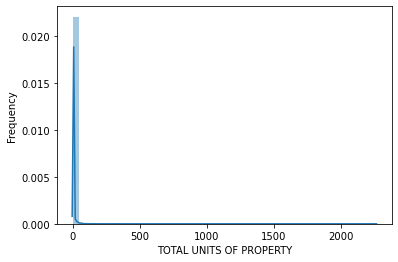

In [37]:
sns.distplot(df_total)
plt.xlabel('TOTAL UNITS OF PROPERTY')
plt.ylabel('Frequency')
plt.show()

fungsi distplot pada library seaborn berguna untuk menggambarkan plot variasi dalam distribusi kepadatan data yang digambarkan dengan histogram dan kombinasi garis dengannya

label x yang digunakan adalah total units dan y merupakan frequency kemunculan data

distribusi probabilitas dari data ini condong ke kiri sehingga menghasilkan histogram yang tidak simetris

## CONFIDENCE INTERVALS

In [38]:
df_new.groupby(['TAX CLASS AT TIME OF SALE', 'YEAR BUILT'])[['YEAR BUILT']].count()

YEAR BUILT
TAX CLASS AT TIME OF SALE YEAR BUILT            
1                         0                 1142
                          1800                 7
                          1829                 1
                          1835                 2
                          1844                 1
...                                          ...
4                         2013                46
                          2014               128
                          2015                78
                          2016                67
                          2017                 2

[405 rows x 1 columns]

dilakukan pengelompokan penghitungan kolom tax class at time of sale dan tahun pembuatan properti berdasarkan tahun

In [39]:
df['TAX CLASS AT TIME OF SALE'].value_counts()

1    41533
2    36726
4     6285
3        4
Name: TAX CLASS AT TIME OF SALE, dtype: int64

melihat value data yang berada pada kolom tersebut. Sehingga, diketahui bahwa terdapat kategori value yang menggambarkan masing-masing data

+ tax 1 berguna untuk 1 unit properti
+ tax 2 berguna untuk 2,3,4 lebih properti
+ tax 3 untuk bisnis atau perusahaan
+ tax 4 untuk properti unik seperti gereja dan rumah sakit

In [40]:
n = 46 + 128 + 78 + 67 + 2
n

321

diambil data value counts dari tahun 2013-2017 yang menghasilkan n = 321

In [41]:
pro_fm = 46/n
pro_fm

0.14330218068535824

In [42]:
print(n, pro_fm)

321 0.14330218068535824


In [43]:
stderror_fm = (pro_fm*(1-pro_fm)/n)**(1/2)
stderror_fm

0.0195563460787212

untuk mencari stderror dari data dengan melakukan perhitungan rumus seperti di atas sehingga menghasilkan std error 0.0195

In [44]:
z_score = 1.96
low_ci_fm = pro_fm - (z_score*stderror_fm)
up_ci_fm = pro_fm + (z_score*stderror_fm)
print('lower: ',low_ci_fm)
print('upper: ',up_ci_fm)

lower:  0.10497174237106469
upper:  0.1816326189996518


kemudian ditentukan z score dan mencari nilai lower dari data dan nilai upper dari data

In [45]:
print('Margin Error: ', (z_score * stderror_fm))

Margin Error:  0.03833043831429355


Margin of error mengidentifikasi seberapa akurat sampel dari populasi tertentu.  Margin error yang didapatkan dari data ini adalah 0,03833

## HYPOTHESIS TESTING

In [46]:
pd.set_option('display.max.columns',25)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


menampilkan kembali data df dan melakukan set tampilan kolom

**Hipotesis**

Uji apakah rata-rata total unit properti di Manhattan lebih rendah daripada rata-rata total unit properti di Queens
+ H0 : rrata-rata total unit properti di Manhattan lebih rendah daripada rata-rata total unit properti di Queens

+ H1 : rata-rata total unit properti di Manhattan tidak lebih rendah (lebih tinggi ) daripada rata-rata total unit properti di Queens

atau

+ H0 : manhattan < queens
+ H1 : manhattan > queens

In [47]:
manhattan = df[df.BOROUGH==1]
queens = df[df.BOROUGH==4]

membuat variabel manhattan yang diambil dari dataframe kolom BOROUGH yang diwakili dengan angka 1 dan membuat variabel baru wilayah queens yang diambil dari dataframe kolom BOROUGH yang diwakili dengan angka 4.

In [48]:
n_manhat = len(manhattan)
mean_manhat = manhattan['TOTAL UNITS'].mean()
std_manhat = manhattan['TOTAL UNITS'].std()
print(n_manhat,mean_manhat,std_manhat)

18306 2.6496230744018354 23.30787338255291


dihitung banyaknya data yang bersangkutan dengan manhattan menggunakn fungsi len(). selanjutnya dicari mean dan standar deviasi dari data yang menyangkut manhattan berdasarkan TOTAL UNITS properti

In [49]:
n_queens = len(queens)
mean_queens = queens['TOTAL UNITS'].mean()
std_queens = queens['TOTAL UNITS'].std()
print(n_queens,mean_queens,std_queens)

26736 1.9389961101137043 23.290275582287226


dihitung banyaknya data yang bersangkutan dengan queens menggunakn fungsi len(). selanjutnya dicari mean dan standar deviasi dari data yang menyangkut queens berdasarkan TOTAL UNITS properti

In [50]:
#confidence level 95%
alpha=0.05

menetapkan alpha 0.05 atau standar kepercayaan dari data adalah 95%

In [51]:
total_hypo_borough = sm.stats.ztest(manhattan['TOTAL UNITS'].astype('float64').dropna(),queens['TOTAL UNITS'].astype('float64').dropna(),alternative='larger')
total_hypo_borough

(3.1795802715348573, 0.0007374425666509496)

untuk melihat hipotesanya, dilakukan perhitungan dengan fungsi ztest dari library stats dan dihapuskan nilai null dari kolom dengan menghitung total units dari manhattan dan queens

In [52]:
if total_hypo_borough[1]>alpha:
    print('Accept Null Hypotesis (h0) Reject H1')
else:
    print('Reject Null Hypotesis (h0) Accept H1')

Reject Null Hypotesis (h0) Accept H1


kemudian, total_hypo yang dicari tadi dilihat apakah lebih dari alpha atau tidak, jika lebih maka akan menerima H0.

Namun, hasil yang didapattkan adalah menolak H0 yang berarti total units manhattan lebih tinggi/besar dibandingkan queens